<img src="https://i.imgur.com/JDsOpVN.png" style="float: left; margin: 20px; height: 290px">

# Production Model and Insights 

---
Predicting House Prices with Linear Regression

**Author**: Miriam Sosa


1. [Define Model for Production](#Define-Model-for-Production)
2. [Summary](#Summary)
3. [Final Kaggle Submission](#Final-Kaggle-Submission)

## Imports

In [1]:
import matplotlib.pyplot as plt        
import numpy as np
import pandas as pd  
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read-in Data

In [2]:
train = pd.read_csv('../data/train_clean.csv', keep_default_na=False, na_values=[''])  
test = pd.read_csv('../data/test_clean.csv', keep_default_na=False, na_values=[''])

## Data Shape

In [3]:
train.shape, test.shape

((2051, 93), (878, 91))

## Define Model for Production

In [ ]:
# Dummies for 'Neighborhood'

In [4]:
features = ['Neighborhood', 
            'foundations', 
            'central_air', 
            'garage_index', 
            'cond_norm', 
            'cond_pos', 
            'LotFrontage', 
            'Year Built', 
            'BsmtFin SF 1', 
            'SF', 
            'outdoorSF']

In [5]:
X = train[features]
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)
X.drop(columns=['Neighborhood_GrnHill',
                'Neighborhood_Landmrk',
                'Neighborhood_Crawfor',
                'Neighborhood_ClearCr',
                'Neighborhood_Greens',
                'Neighborhood_Somerst',
                'Neighborhood_Timber',
                'Neighborhood_Veenker'],inplace=True)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

 Dropped dummy variables for neighborhoods w/ no statistical impact, 

Dropped colinear variables and other theoretically non-essential elements from other models tested

In [6]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
lr_1.score(X_train, y_train), lr_1.score(X_test, y_test)

(0.7966704169815569, 0.8237557890294779)

In [7]:
ols = sm.OLS(y, X).fit()


In [42]:
test['yr_sold'].describe()

count     878.000000
mean     2007.825740
std         1.327861
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yr_sold, dtype: float64

## Summary

- Adjusted R2 shows that roughly 97% of variation in train data is explained by these predictors (see below).
- However, predictive score is not quite as powerful. It still seems quite good though around 80%.
- A good balance of variance and bias seems to have been achieved based on these scores.

- - - 
- Holding all else constant, `3 neighborhoods` were associated with increased sale price while 15 or so more were associated with decreased sale price.

- Holding all else constant, having `Central Air` was associated with ~$12,000 increase in sale price. Similar findings were found for Normal Conditions, and favorable foundation types.

- Having `favorable conditions` (parks nearby) had a bigger association with sale price, holding all else constant. Presumably a lot of value is lost by unfavorable conditions like proximity to railroads and being adjacent to main roads).

- `Square Feet` is a very valuable predictor of sale price, and it appears to have a more substantial assocition than outdoor (deck, proch) SF and finished basement SF.

- Older homes had lower sale prices than newer homes, holding all else constant. 
- My index for `usable garage area (#cars)` and `garage condition (not bad, vs bad)` also was a valuable feature. Larger garages with better conditions were associated with higher sale prices.

In [8]:
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2124.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                        0.00
Time:                        07:34:47   Log-Likelihood:                         -24388.
No. Observations:                2051   AIC:                                  4.883e+04
Df Residuals:                    2022   BIC:                                  4.900e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
foundations           1.364e+04   2341.650      5.825      0.000    9048.198    1.82e+04
central_air           1.257e+04   3465.652      3.627      0.000    5773.509    1.94e+04
garage_index          7551.1830    710.586     10.627      0.000    6157.626    8944.740
cond_norm             1.104e+04   2549.862      4.329      0.000    6037.963     1.6e+04
cond_pos              4.565e+04   6234.716      7.321      0.000    3.34e+04    5.79e+04
LotFrontage            115.1991     44.434      2.593      0.010      28.058     202.340
Year Built              19.6780      3.054      6.443      0.000      13.689      25.667
BsmtFin SF 1            28.5555      1.880     15.187      0.000      24.868      32.243
SF                      56.7057      2.127     26.655      0.000      52.534      60.878
outdoorSF               35.3208      6.011      5.876      0.000      23.533      47.109
Neighborhood_Blueste  -3.35e+04   1.49e+04     -2.254      0.024   -6.27e+04   -4349.295
Neighborhood_BrDale  -4.813e+04   8812.240     -5.462      0.000   -6.54e+04   -3.08e+04
Neighborhood_BrkSide -3.596e+04   4815.281     -7.467      0.000   -4.54e+04   -2.65e+04
Neighborhood_CollgCr -1.854e+04   3365.766     -5.510      0.000   -2.51e+04   -1.19e+04
Neighborhood_Edwards -4.702e+04   3881.322    -12.116      0.000   -5.46e+04   -3.94e+04
Neighborhood_Gilbert -2.777e+04   3937.759     -7.051      0.000   -3.55e+04      -2e+04
Neighborhood_IDOTRR  -4.922e+04   5155.570     -9.547      0.000   -5.93e+04   -3.91e+04
Neighborhood_MeadowV -6.274e+04   7841.334     -8.001      0.000   -7.81e+04   -4.74e+04
Neighborhood_Mitchel  -3.84e+04   4492.255     -8.548      0.000   -4.72e+04   -2.96e+04
Neighborhood_NAmes     -3.7e+04   3256.843    -11.362      0.000   -4.34e+04   -3.06e+04
Neighborhood_NPkVill -3.756e+04   9153.958     -4.103      0.000   -5.55e+04   -1.96e+04
Neighborhood_NWAmes  -3.331e+04   4536.376     -7.343      0.000   -4.22e+04   -2.44e+04
Neighborhood_NoRidge  1.923e+04   5768.786      3.333      0.001    7915.568    3.05e+04
Neighborhood_NridgHt  5.482e+04   3991.189     13.735      0.000     4.7e+04    6.26e+04
Neighborhood_OldTown -4.625e+04   3754.423    -12.319      0.000   -5.36e+04   -3.89e+04
Neighborhood_SWISU   -4.119e+04   6826.916     -6.034      0.000   -5.46e+04   -2.78e+04
Neighborhood_Sawyer  -3.657e+04   4291.016     -8.522      0.000    -4.5e+04   -2.82e+04
Neighborhood_SawyerW -3.122e+04   4324.529     -7.218      0.000   -3.97e+04   -2.27e+04
Neighborhood_StoneBr  6.813e+04   6190.662     11.005      0.000     5.6e+04    8.03e+04
==============================================================================
Omnibus:                      545.989   Durbin-Watson:   

In [9]:
lr_1.coef_

array([ 5.74755186e+03,  9.28041273e+03,  7.00545374e+03,  1.01061525e+04,
        5.27909320e+04,  6.99051999e+01,  2.99564624e+02,  2.49583344e+01,
        5.70797325e+01,  2.76913583e+01, -3.44827736e+04, -5.33339945e+04,
       -2.55424349e+04, -1.89855358e+04, -4.70869727e+04, -2.80006633e+04,
       -4.03219087e+04, -5.92614163e+04, -3.74534214e+04, -3.33412063e+04,
       -4.21314145e+04, -3.37915075e+04,  2.60811540e+04,  6.03832424e+04,
       -3.43004652e+04, -2.72536265e+04, -3.47899819e+04, -3.14778412e+04,
        7.26044645e+04])

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   foundations           2051 non-null   int64  
 1   central_air           2051 non-null   int64  
 2   garage_index          2051 non-null   float64
 3   cond_norm             2051 non-null   int64  
 4   cond_pos              2051 non-null   int64  
 5   LotFrontage           2051 non-null   float64
 6   Year Built            2051 non-null   int64  
 7   BsmtFin SF 1          2051 non-null   float64
 8   SF                    2051 non-null   int64  
 9   outdoorSF             2051 non-null   int64  
 10  Neighborhood_Blueste  2051 non-null   uint8  
 11  Neighborhood_BrDale   2051 non-null   uint8  
 12  Neighborhood_BrkSide  2051 non-null   uint8  
 13  Neighborhood_CollgCr  2051 non-null   uint8  
 14  Neighborhood_Edwards  2051 non-null   uint8  
 15  Neighborhood_Gilbert 

## [Final Kaggle Submission](https://www.kaggle.com/competitions/dsir-bluebird-project-2-regression-challenge/leaderboard) 

In [12]:
X = test[features]
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)
X.drop(columns=['Neighborhood_Crawfor','Neighborhood_ClearCr','Neighborhood_Greens','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker'], inplace=True)


In [13]:
kaggle_preds = lr_1.predict(X)

In [14]:
test.columns = [column.replace(' ', '_').lower() for column in test.columns]

In [15]:
test['saleprice'] = kaggle_preds

In [16]:
test[['id','saleprice']]

,id,saleprice
0,2658,130993.057107
1,2718,186073.397858
2,2414,192267.151176
3,1989,94086.092216
4,625,163218.220017
...,...,...
873,1662,245746.693197
874,1234,202976.075188
875,1373,118475.819157
876,1672,138620.954160


In [17]:
test[['id','saleprice']].to_csv('submissions/kaggle_sub_model_production.csv', index=False)

In [ ]:
# Evaluate LINEM assumptions for Multiple Linear Regression

In [19]:
# Linear associations were found for predictive features included in the model (see EDA)

In [20]:
# Remove Neighborhood for a more efficient pairplort to test independence

In [21]:
features2 = ['foundations', 'central_air', 'garage_index', 'cond_norm', 'cond_pos', 'LotFrontage', 'Year Built', 'BsmtFin SF 1', 'SF', 'outdoorSF']

In [22]:
X = train[features2]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

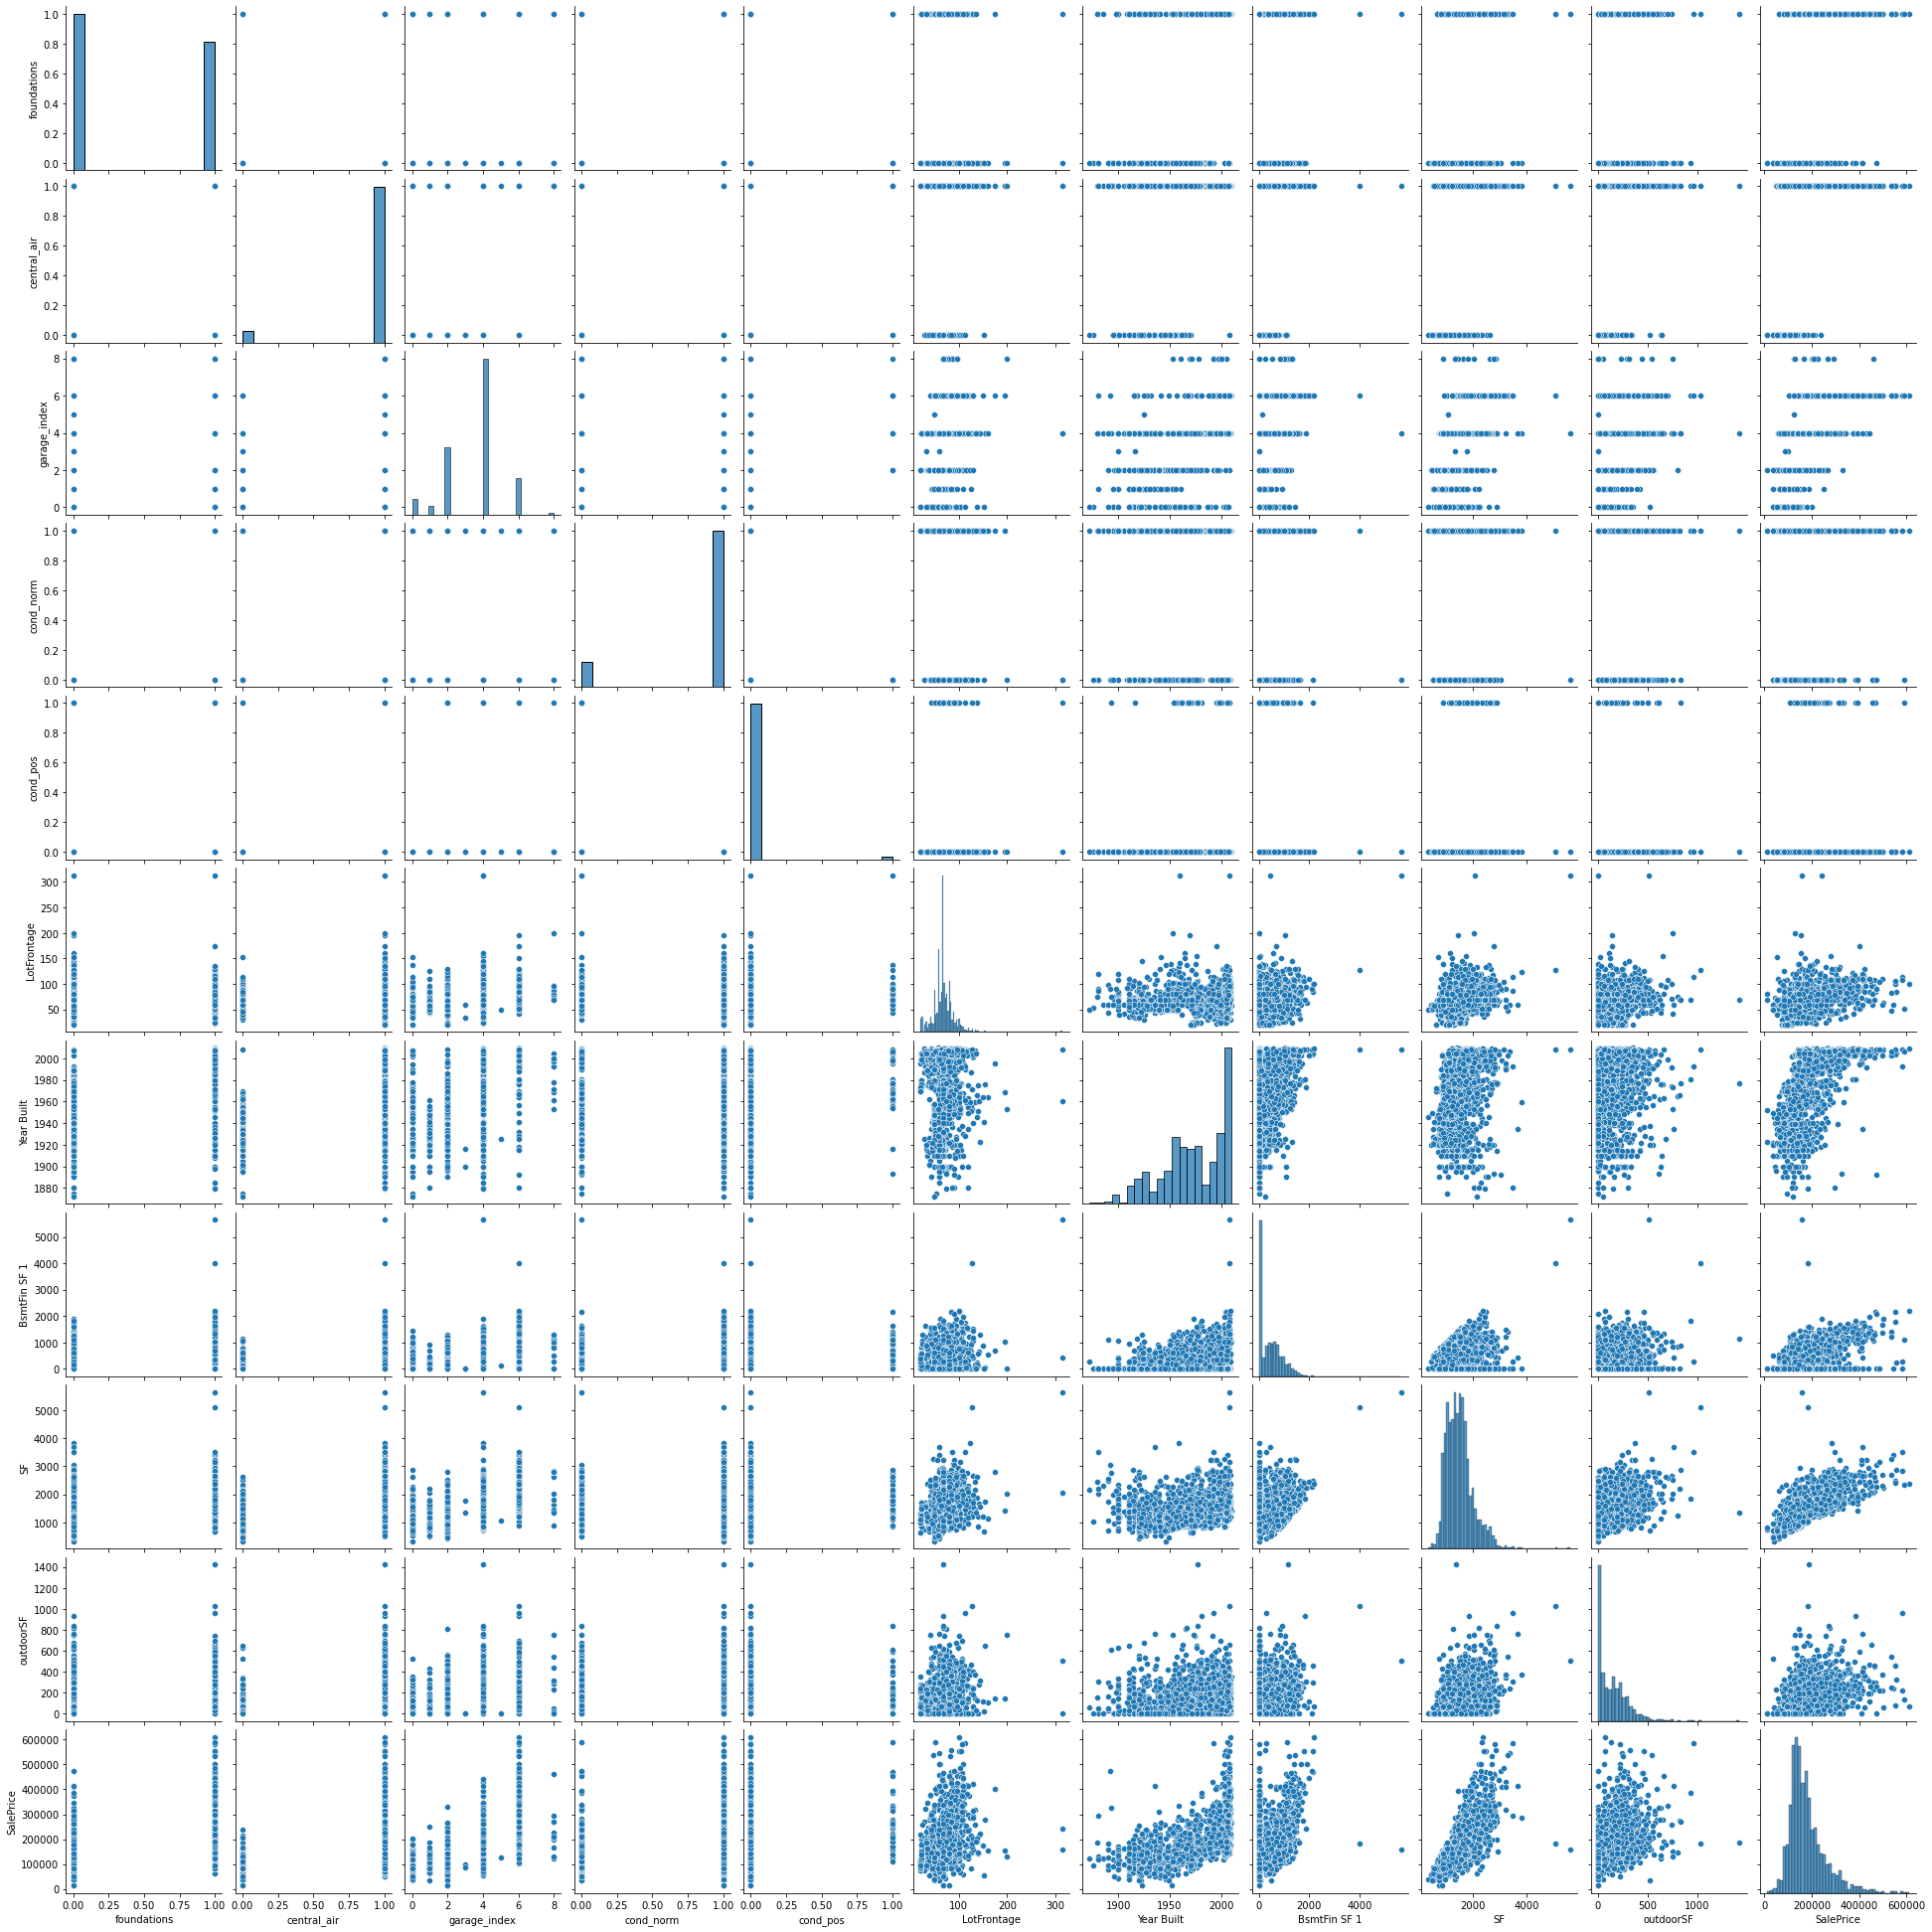

In [23]:
sns.pairplot(pd.merge(X, y, left_index = True, right_index = True));

In [24]:
# ASSUMED errors are independednt

In [25]:
# Reload our actual X for future use

In [26]:
X = train[features]
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)
X.drop(columns=['Neighborhood_GrnHill','Neighborhood_Landmrk','Neighborhood_Crawfor','Neighborhood_ClearCr','Neighborhood_Greens','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker'], inplace=True)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
y_preds = lr_1.predict(X) 

In [28]:
residuals = y - y_preds

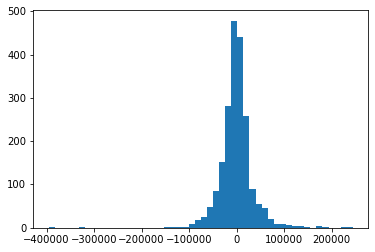

In [29]:
plt.hist(residuals, bins=50);

In [30]:
# Residuals are normally distributed. So this passes 

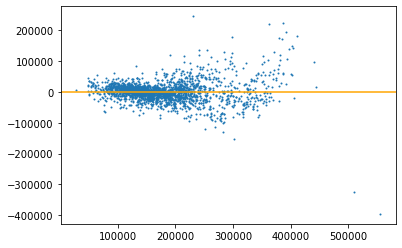

In [31]:
# E: there may be some small pattern but errors seem generally well distributed
plt.scatter(y_preds, residuals, s=1)
plt.axhline(0, color="orange");

In [32]:
# M - No Multicollinearity/Independence of Predictors 